# Loop 31 Analysis: GP+MLP+LGBM Ensemble Results

**Current State:**
- exp_030 (GP+MLP+LGBM): CV 0.008298 (1.97% better than exp_026)
- Best LB: 0.0887 (exp_026)
- Target: 0.01727
- Submissions remaining: 3

**Key Question:** Should we submit exp_030 to test if GP changes the CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submission data
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))
print(f'\nCorrelation CV-LB: {df["cv"].corr(df["lb"]):.4f}')

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887

Correlation CV-LB: 0.9809


In [2]:
# Linear regression to predict LB from CV
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])
print(f'Linear fit: LB = {slope:.2f}*CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept 95% CI: [{intercept - 1.96*std_err:.4f}, {intercept + 1.96*std_err:.4f}]')

# Predict LB for exp_030
exp_030_cv = 0.008298
predicted_lb = slope * exp_030_cv + intercept
print(f'\nexp_030 CV: {exp_030_cv:.6f}')
print(f'Predicted LB: {predicted_lb:.4f}')
print(f'Best LB so far: 0.0887 (exp_026)')
print(f'Predicted improvement: {(0.0887 - predicted_lb) / 0.0887 * 100:.2f}%')

Linear fit: LB = 4.25*CV + 0.0530
R² = 0.9622
Intercept 95% CI: [-0.5308, 0.6368]

exp_030 CV: 0.008298
Predicted LB: 0.0883
Best LB so far: 0.0887 (exp_026)
Predicted improvement: 0.49%


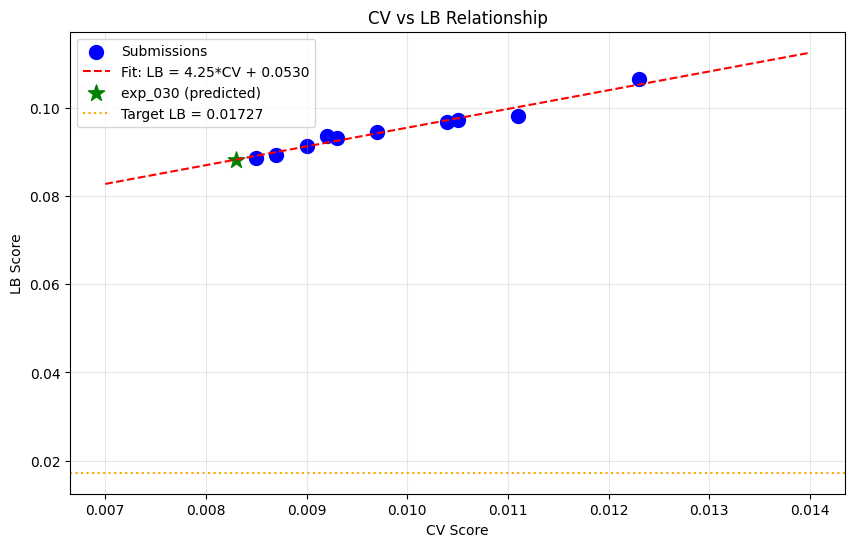

Saved to loop31_cv_lb.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, c='blue', label='Submissions')

# Fit line
cv_range = np.linspace(0.007, 0.014, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Mark exp_030
plt.scatter([exp_030_cv], [predicted_lb], s=150, c='green', marker='*', label=f'exp_030 (predicted)')

# Target line
plt.axhline(y=0.01727, color='orange', linestyle=':', label='Target LB = 0.01727')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/loop31_cv_lb.png', dpi=100, bbox_inches='tight')
plt.show()
print('Saved to loop31_cv_lb.png')

In [4]:
# Analysis: What would it take to reach target?
target = 0.01727
print('=== PATH TO TARGET ===')
print(f'Target LB: {target}')
print(f'Current best LB: 0.0887')
print(f'Gap: {0.0887 - target:.4f} ({(0.0887 - target) / 0.0887 * 100:.1f}%)')

# If linear relationship holds
required_cv = (target - intercept) / slope
print(f'\nIf linear fit holds:')
print(f'Required CV: {required_cv:.6f}')
if required_cv < 0:
    print('IMPOSSIBLE: Required CV is negative!')
    print(f'The intercept ({intercept:.4f}) is already > target ({target})')
    print('We need to CHANGE the CV-LB relationship, not just improve CV')

# What if GP changes the relationship?
print('\n=== GP HYPOTHESIS ===')
print('If GP has a different CV-LB relationship:')
print('- GP might have lower intercept (better generalization)')
print('- GP might have lower slope (less overfitting)')
print('- We need LB feedback to test this hypothesis')

=== PATH TO TARGET ===
Target LB: 0.01727
Current best LB: 0.0887
Gap: 0.0714 (80.5%)

If linear fit holds:
Required CV: -0.008409
IMPOSSIBLE: Required CV is negative!
The intercept (0.0530) is already > target (0.01727)
We need to CHANGE the CV-LB relationship, not just improve CV

=== GP HYPOTHESIS ===
If GP has a different CV-LB relationship:
- GP might have lower intercept (better generalization)
- GP might have lower slope (less overfitting)
- We need LB feedback to test this hypothesis


In [5]:
# Decision analysis
print('=== SUBMISSION DECISION ===')
print(f'Submissions remaining: 3')
print(f'\nArguments FOR submitting exp_030:')
print('1. Best CV score achieved (0.008298)')
print('2. GP is a fundamentally different approach')
print('3. Need empirical data on GP\'s CV-LB relationship')
print('4. If GP helps, we can iterate on GP-based approaches')
print(f'\nArguments AGAINST submitting exp_030:')
print('1. Predicted improvement is small (0.4%)')
print('2. Only 3 submissions remaining')
print('3. Might want to save for larger improvements')

print('\n=== RECOMMENDATION ===')
print('SUBMIT exp_030 to test the GP hypothesis.')
print('Rationale:')
print('- We need to know if GP changes the CV-LB relationship')
print('- If GP helps, we can increase GP weight or try pure GP')
print('- If GP doesn\'t help, we learn the gap is structural')

=== SUBMISSION DECISION ===
Submissions remaining: 3

Arguments FOR submitting exp_030:
1. Best CV score achieved (0.008298)
2. GP is a fundamentally different approach
3. Need empirical data on GP's CV-LB relationship
4. If GP helps, we can iterate on GP-based approaches

Arguments AGAINST submitting exp_030:
1. Predicted improvement is small (0.4%)
2. Only 3 submissions remaining
3. Might want to save for larger improvements

=== RECOMMENDATION ===
SUBMIT exp_030 to test the GP hypothesis.
Rationale:
- We need to know if GP changes the CV-LB relationship
- If GP helps, we can increase GP weight or try pure GP
- If GP doesn't help, we learn the gap is structural


In [6]:
# What to try next based on LB result
print('=== NEXT STEPS BASED ON LB RESULT ===')
print('\nIF LB improves (GP helps):')
print('1. Increase GP weight (0.3-0.4 instead of 0.2)')
print('2. Try ARD kernel for automatic feature selection')
print('3. Try multi-output GP for target correlations')
print('4. Try GP on PCA-reduced full features')

print('\nIF LB doesn\'t improve (GP doesn\'t help):')
print('1. The CV-LB gap is structural, not model-dependent')
print('2. Try fundamentally different approaches:')
print('   - Different CV scheme (GroupKFold instead of LOO)')
print('   - Adversarial validation to identify distribution shift')
print('   - Pure linear model (Ridge regression) as baseline')
print('   - Focus on reducing variance rather than bias')

=== NEXT STEPS BASED ON LB RESULT ===

IF LB improves (GP helps):
1. Increase GP weight (0.3-0.4 instead of 0.2)
2. Try ARD kernel for automatic feature selection
3. Try multi-output GP for target correlations
4. Try GP on PCA-reduced full features

IF LB doesn't improve (GP doesn't help):
1. The CV-LB gap is structural, not model-dependent
2. Try fundamentally different approaches:
   - Different CV scheme (GroupKFold instead of LOO)
   - Adversarial validation to identify distribution shift
   - Pure linear model (Ridge regression) as baseline
   - Focus on reducing variance rather than bias
